In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings


from sklearn.datasets import make_classification 
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter

from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [2]:
# Load the data
import os 
file_path = os.path.join("Resources","njhome_floodsummary.csv")
#file_path = Path('.\Resources\Newbrunswick_ML.csv')
df = pd.read_csv(file_path,encoding="utf-8")
df

,city,lat,long,elevation,month,year,city_max_day_rain,city_month_total_rain,city_avg_daily_rain,anomalypct,anomaly,county,sizerank,eom_date,avg_home_price,price_drop
0,New Brunswick,40.489649,-74.440877,12.5,1,2011,1.65,3.68,0.122667,0.448370,N,Middlesex County,2082,2011-01-31,231948,Y
1,New Brunswick,40.489649,-74.440877,12.5,2,2011,0.76,1.68,0.088421,0.452381,N,Middlesex County,2082,2011-02-28,231815,Y
2,New Brunswick,40.489649,-74.440877,12.5,3,2011,2.09,5.80,0.241667,0.360345,N,Middlesex County,2082,2011-03-31,231216,Y
3,New Brunswick,40.489649,-74.440877,12.5,4,2011,2.64,3.86,0.183810,0.683938,N,Middlesex County,2082,2011-04-30,228634,Y
4,New Brunswick,40.489649,-74.440877,12.5,5,2011,0.62,2.00,0.068966,0.310000,N,Middlesex County,2082,2011-05-31,226534,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,New Brunswick,40.489649,-74.440877,12.5,1,2022,1.50,4.34,0.140000,0.345622,N,Middlesex County,2082,2022-01-31,345281,N
681,New Brunswick,40.489649,-74.440877,12.5,2,2022,0.65,3.14,0.112143,0.207006,N,Middlesex County,2082,2022-02-28,347723,N
682,New Brunswick,40.489649,-74.440877,12.5,3,2022,0.57,2.57,0.082903,0.221790,N,Middlesex County,2082,2022-03-31,350051,N
683,New Brunswick,40.489649,-74.440877,12.5,4,2022,1.34,4.93,0.164333,0.271805,N,Middlesex County,2082,2022-04-30,354406,N


In [3]:
# Learn more about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   685 non-null    object 
 1   lat                    685 non-null    float64
 2   long                   685 non-null    float64
 3   elevation              685 non-null    float64
 4   month                  685 non-null    int64  
 5   year                   685 non-null    int64  
 6   city_max_day_rain      685 non-null    float64
 7   city_month_total_rain  685 non-null    float64
 8   city_avg_daily_rain    685 non-null    float64
 9   anomalypct             685 non-null    float64
 10  anomaly                685 non-null    object 
 11  county                 685 non-null    object 
 12  sizerank               685 non-null    int64  
 13  eom_date               685 non-null    object 
 14  avg_home_price         685 non-null    int64  
 15  price_

In [4]:
df['price_drop'].replace(['Y','N'],[1,0],inplace=True)

In [5]:
df

,city,lat,long,elevation,month,year,city_max_day_rain,city_month_total_rain,city_avg_daily_rain,anomalypct,anomaly,county,sizerank,eom_date,avg_home_price,price_drop
0,New Brunswick,40.489649,-74.440877,12.5,1,2011,1.65,3.68,0.122667,0.448370,N,Middlesex County,2082,2011-01-31,231948,1
1,New Brunswick,40.489649,-74.440877,12.5,2,2011,0.76,1.68,0.088421,0.452381,N,Middlesex County,2082,2011-02-28,231815,1
2,New Brunswick,40.489649,-74.440877,12.5,3,2011,2.09,5.80,0.241667,0.360345,N,Middlesex County,2082,2011-03-31,231216,1
3,New Brunswick,40.489649,-74.440877,12.5,4,2011,2.64,3.86,0.183810,0.683938,N,Middlesex County,2082,2011-04-30,228634,1
4,New Brunswick,40.489649,-74.440877,12.5,5,2011,0.62,2.00,0.068966,0.310000,N,Middlesex County,2082,2011-05-31,226534,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,New Brunswick,40.489649,-74.440877,12.5,1,2022,1.50,4.34,0.140000,0.345622,N,Middlesex County,2082,2022-01-31,345281,0
681,New Brunswick,40.489649,-74.440877,12.5,2,2022,0.65,3.14,0.112143,0.207006,N,Middlesex County,2082,2022-02-28,347723,0
682,New Brunswick,40.489649,-74.440877,12.5,3,2022,0.57,2.57,0.082903,0.221790,N,Middlesex County,2082,2022-03-31,350051,0
683,New Brunswick,40.489649,-74.440877,12.5,4,2022,1.34,4.93,0.164333,0.271805,N,Middlesex County,2082,2022-04-30,354406,0


In [6]:
df['anomaly'].replace(['Y','N'],[1,0],inplace=True)

In [7]:
df

,city,lat,long,elevation,month,year,city_max_day_rain,city_month_total_rain,city_avg_daily_rain,anomalypct,anomaly,county,sizerank,eom_date,avg_home_price,price_drop
0,New Brunswick,40.489649,-74.440877,12.5,1,2011,1.65,3.68,0.122667,0.448370,0,Middlesex County,2082,2011-01-31,231948,1
1,New Brunswick,40.489649,-74.440877,12.5,2,2011,0.76,1.68,0.088421,0.452381,0,Middlesex County,2082,2011-02-28,231815,1
2,New Brunswick,40.489649,-74.440877,12.5,3,2011,2.09,5.80,0.241667,0.360345,0,Middlesex County,2082,2011-03-31,231216,1
3,New Brunswick,40.489649,-74.440877,12.5,4,2011,2.64,3.86,0.183810,0.683938,0,Middlesex County,2082,2011-04-30,228634,1
4,New Brunswick,40.489649,-74.440877,12.5,5,2011,0.62,2.00,0.068966,0.310000,0,Middlesex County,2082,2011-05-31,226534,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,New Brunswick,40.489649,-74.440877,12.5,1,2022,1.50,4.34,0.140000,0.345622,0,Middlesex County,2082,2022-01-31,345281,0
681,New Brunswick,40.489649,-74.440877,12.5,2,2022,0.65,3.14,0.112143,0.207006,0,Middlesex County,2082,2022-02-28,347723,0
682,New Brunswick,40.489649,-74.440877,12.5,3,2022,0.57,2.57,0.082903,0.221790,0,Middlesex County,2082,2022-03-31,350051,0
683,New Brunswick,40.489649,-74.440877,12.5,4,2022,1.34,4.93,0.164333,0.271805,0,Middlesex County,2082,2022-04-30,354406,0


In [8]:
import numpy as np
import pandas as pd

df['county'] = df['county'].replace('Middlesex County', 1)


df

,city,lat,long,elevation,month,year,city_max_day_rain,city_month_total_rain,city_avg_daily_rain,anomalypct,anomaly,county,sizerank,eom_date,avg_home_price,price_drop
0,New Brunswick,40.489649,-74.440877,12.5,1,2011,1.65,3.68,0.122667,0.448370,0,1,2082,2011-01-31,231948,1
1,New Brunswick,40.489649,-74.440877,12.5,2,2011,0.76,1.68,0.088421,0.452381,0,1,2082,2011-02-28,231815,1
2,New Brunswick,40.489649,-74.440877,12.5,3,2011,2.09,5.80,0.241667,0.360345,0,1,2082,2011-03-31,231216,1
3,New Brunswick,40.489649,-74.440877,12.5,4,2011,2.64,3.86,0.183810,0.683938,0,1,2082,2011-04-30,228634,1
4,New Brunswick,40.489649,-74.440877,12.5,5,2011,0.62,2.00,0.068966,0.310000,0,1,2082,2011-05-31,226534,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,New Brunswick,40.489649,-74.440877,12.5,1,2022,1.50,4.34,0.140000,0.345622,0,1,2082,2022-01-31,345281,0
681,New Brunswick,40.489649,-74.440877,12.5,2,2022,0.65,3.14,0.112143,0.207006,0,1,2082,2022-02-28,347723,0
682,New Brunswick,40.489649,-74.440877,12.5,3,2022,0.57,2.57,0.082903,0.221790,0,1,2082,2022-03-31,350051,0
683,New Brunswick,40.489649,-74.440877,12.5,4,2022,1.34,4.93,0.164333,0.271805,0,1,2082,2022-04-30,354406,0


In [9]:
df['city'] = df['city'].replace('New Brunswick', 1)
df

,city,lat,long,elevation,month,year,city_max_day_rain,city_month_total_rain,city_avg_daily_rain,anomalypct,anomaly,county,sizerank,eom_date,avg_home_price,price_drop
0,1,40.489649,-74.440877,12.5,1,2011,1.65,3.68,0.122667,0.448370,0,1,2082,2011-01-31,231948,1
1,1,40.489649,-74.440877,12.5,2,2011,0.76,1.68,0.088421,0.452381,0,1,2082,2011-02-28,231815,1
2,1,40.489649,-74.440877,12.5,3,2011,2.09,5.80,0.241667,0.360345,0,1,2082,2011-03-31,231216,1
3,1,40.489649,-74.440877,12.5,4,2011,2.64,3.86,0.183810,0.683938,0,1,2082,2011-04-30,228634,1
4,1,40.489649,-74.440877,12.5,5,2011,0.62,2.00,0.068966,0.310000,0,1,2082,2011-05-31,226534,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,1,40.489649,-74.440877,12.5,1,2022,1.50,4.34,0.140000,0.345622,0,1,2082,2022-01-31,345281,0
681,1,40.489649,-74.440877,12.5,2,2022,0.65,3.14,0.112143,0.207006,0,1,2082,2022-02-28,347723,0
682,1,40.489649,-74.440877,12.5,3,2022,0.57,2.57,0.082903,0.221790,0,1,2082,2022-03-31,350051,0
683,1,40.489649,-74.440877,12.5,4,2022,1.34,4.93,0.164333,0.271805,0,1,2082,2022-04-30,354406,0


In [10]:
df['city'] = df['city'].replace('Bridgewater',2)
df

,city,lat,long,elevation,month,year,city_max_day_rain,city_month_total_rain,city_avg_daily_rain,anomalypct,anomaly,county,sizerank,eom_date,avg_home_price,price_drop
0,1,40.489649,-74.440877,12.5,1,2011,1.65,3.68,0.122667,0.448370,0,1,2082,2011-01-31,231948,1
1,1,40.489649,-74.440877,12.5,2,2011,0.76,1.68,0.088421,0.452381,0,1,2082,2011-02-28,231815,1
2,1,40.489649,-74.440877,12.5,3,2011,2.09,5.80,0.241667,0.360345,0,1,2082,2011-03-31,231216,1
3,1,40.489649,-74.440877,12.5,4,2011,2.64,3.86,0.183810,0.683938,0,1,2082,2011-04-30,228634,1
4,1,40.489649,-74.440877,12.5,5,2011,0.62,2.00,0.068966,0.310000,0,1,2082,2011-05-31,226534,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,1,40.489649,-74.440877,12.5,1,2022,1.50,4.34,0.140000,0.345622,0,1,2082,2022-01-31,345281,0
681,1,40.489649,-74.440877,12.5,2,2022,0.65,3.14,0.112143,0.207006,0,1,2082,2022-02-28,347723,0
682,1,40.489649,-74.440877,12.5,3,2022,0.57,2.57,0.082903,0.221790,0,1,2082,2022-03-31,350051,0
683,1,40.489649,-74.440877,12.5,4,2022,1.34,4.93,0.164333,0.271805,0,1,2082,2022-04-30,354406,0


In [11]:
df.drop('eom_date', axis=1, inplace=True)
df

,city,lat,long,elevation,month,year,city_max_day_rain,city_month_total_rain,city_avg_daily_rain,anomalypct,anomaly,county,sizerank,avg_home_price,price_drop
0,1,40.489649,-74.440877,12.5,1,2011,1.65,3.68,0.122667,0.448370,0,1,2082,231948,1
1,1,40.489649,-74.440877,12.5,2,2011,0.76,1.68,0.088421,0.452381,0,1,2082,231815,1
2,1,40.489649,-74.440877,12.5,3,2011,2.09,5.80,0.241667,0.360345,0,1,2082,231216,1
3,1,40.489649,-74.440877,12.5,4,2011,2.64,3.86,0.183810,0.683938,0,1,2082,228634,1
4,1,40.489649,-74.440877,12.5,5,2011,0.62,2.00,0.068966,0.310000,0,1,2082,226534,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,1,40.489649,-74.440877,12.5,1,2022,1.50,4.34,0.140000,0.345622,0,1,2082,345281,0
681,1,40.489649,-74.440877,12.5,2,2022,0.65,3.14,0.112143,0.207006,0,1,2082,347723,0
682,1,40.489649,-74.440877,12.5,3,2022,0.57,2.57,0.082903,0.221790,0,1,2082,350051,0
683,1,40.489649,-74.440877,12.5,4,2022,1.34,4.93,0.164333,0.271805,0,1,2082,354406,0


In [12]:
df['city'] = df['city'].replace('Bridgewater',2)
df

,city,lat,long,elevation,month,year,city_max_day_rain,city_month_total_rain,city_avg_daily_rain,anomalypct,anomaly,county,sizerank,avg_home_price,price_drop
0,1,40.489649,-74.440877,12.5,1,2011,1.65,3.68,0.122667,0.448370,0,1,2082,231948,1
1,1,40.489649,-74.440877,12.5,2,2011,0.76,1.68,0.088421,0.452381,0,1,2082,231815,1
2,1,40.489649,-74.440877,12.5,3,2011,2.09,5.80,0.241667,0.360345,0,1,2082,231216,1
3,1,40.489649,-74.440877,12.5,4,2011,2.64,3.86,0.183810,0.683938,0,1,2082,228634,1
4,1,40.489649,-74.440877,12.5,5,2011,0.62,2.00,0.068966,0.310000,0,1,2082,226534,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,1,40.489649,-74.440877,12.5,1,2022,1.50,4.34,0.140000,0.345622,0,1,2082,345281,0
681,1,40.489649,-74.440877,12.5,2,2022,0.65,3.14,0.112143,0.207006,0,1,2082,347723,0
682,1,40.489649,-74.440877,12.5,3,2022,0.57,2.57,0.082903,0.221790,0,1,2082,350051,0
683,1,40.489649,-74.440877,12.5,4,2022,1.34,4.93,0.164333,0.271805,0,1,2082,354406,0


In [13]:
df['county'] = df['county'].replace('Somerset County', 2)


df

,city,lat,long,elevation,month,year,city_max_day_rain,city_month_total_rain,city_avg_daily_rain,anomalypct,anomaly,county,sizerank,avg_home_price,price_drop
0,1,40.489649,-74.440877,12.5,1,2011,1.65,3.68,0.122667,0.448370,0,1,2082,231948,1
1,1,40.489649,-74.440877,12.5,2,2011,0.76,1.68,0.088421,0.452381,0,1,2082,231815,1
2,1,40.489649,-74.440877,12.5,3,2011,2.09,5.80,0.241667,0.360345,0,1,2082,231216,1
3,1,40.489649,-74.440877,12.5,4,2011,2.64,3.86,0.183810,0.683938,0,1,2082,228634,1
4,1,40.489649,-74.440877,12.5,5,2011,0.62,2.00,0.068966,0.310000,0,1,2082,226534,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,1,40.489649,-74.440877,12.5,1,2022,1.50,4.34,0.140000,0.345622,0,1,2082,345281,0
681,1,40.489649,-74.440877,12.5,2,2022,0.65,3.14,0.112143,0.207006,0,1,2082,347723,0
682,1,40.489649,-74.440877,12.5,3,2022,0.57,2.57,0.082903,0.221790,0,1,2082,350051,0
683,1,40.489649,-74.440877,12.5,4,2022,1.34,4.93,0.164333,0.271805,0,1,2082,354406,0


In [14]:
df.columns

Index(['city', 'lat', 'long', 'elevation', 'month', 'year',
       'city_max_day_rain', 'city_month_total_rain', 'city_avg_daily_rain',
       'anomalypct', 'anomaly', 'county', 'sizerank', 'avg_home_price',
       'price_drop'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   685 non-null    int64  
 1   lat                    685 non-null    float64
 2   long                   685 non-null    float64
 3   elevation              685 non-null    float64
 4   month                  685 non-null    int64  
 5   year                   685 non-null    int64  
 6   city_max_day_rain      685 non-null    float64
 7   city_month_total_rain  685 non-null    float64
 8   city_avg_daily_rain    685 non-null    float64
 9   anomalypct             685 non-null    float64
 10  anomaly                685 non-null    int64  
 11  county                 685 non-null    int64  
 12  sizerank               685 non-null    int64  
 13  avg_home_price         685 non-null    int64  
 14  price_drop             685 non-null    int64  
dtypes: flo

In [16]:
X = df[[ 'city','elevation','month','year','city_month_total_rain','anomalypct','avg_home_price'
      ]]
y = df['price_drop']

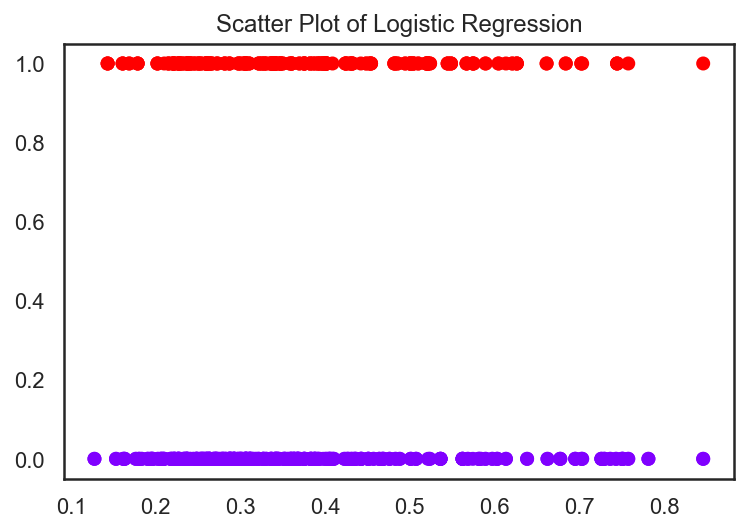

In [17]:
# visualize the Data

X = df[ 'anomalypct']
y = df['price_drop']
plt.scatter(X, y,c=y,cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression')

plt.show()

In [18]:
#X = df[[ 'city','elevation','month','year','city_month_total_rain','anomalypct','avg_home_price'
#      ]]
X = df.drop(columns='price_drop')
y = df['price_drop']


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,stratify=y)

In [21]:
X_train.shape

(513, 14)

In [22]:
from sklearn.linear_model import LogisticRegression


In [23]:
#Perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [24]:
#Perform prediction using the test Dataset
y_pred =log_reg.predict(X_test)
results =pd.DataFrame({"Prediction":y_pred,"Actual" : y_test}).reset_index(drop=True)
results

,Prediction,Actual
0,0,0
1,0,1
2,1,1
3,0,0
4,0,0
...,...,...
167,0,1
168,0,0
169,0,0
170,0,0


In [25]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test,y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,91,14
Actual 1,55,12


In [26]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))

0.5988372093023255


# Fit the Decision Tree Model

In [27]:
import pandas as pd

from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [28]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [29]:
# Creating the decision tree classifier instance.
model = tree.DecisionTreeClassifier()
# Fitting the model.
model = model.fit(X_train_scaled, y_train)

Make Predictions Using the Testing Data

In [30]:
# Making predictions using the testing data.
predictions = model.predict(X_test_scaled)
print(predictions) 

[0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0
 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0
 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


Evaluate the Model

In [31]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,89,16
Actual 1,21,46


In [32]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
print(acc_score)

0.7848837209302325


In [33]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,89,16
Actual 1,21,46


Accuracy Score : 0.7848837209302325
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.74      0.69      0.71        67

    accuracy                           0.78       172
   macro avg       0.78      0.77      0.77       172
weighted avg       0.78      0.78      0.78       172



# RANDOM FOREST MODEL -ensemble learning 

In [34]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Loading data

In [35]:
df

,city,lat,long,elevation,month,year,city_max_day_rain,city_month_total_rain,city_avg_daily_rain,anomalypct,anomaly,county,sizerank,avg_home_price,price_drop
0,1,40.489649,-74.440877,12.5,1,2011,1.65,3.68,0.122667,0.448370,0,1,2082,231948,1
1,1,40.489649,-74.440877,12.5,2,2011,0.76,1.68,0.088421,0.452381,0,1,2082,231815,1
2,1,40.489649,-74.440877,12.5,3,2011,2.09,5.80,0.241667,0.360345,0,1,2082,231216,1
3,1,40.489649,-74.440877,12.5,4,2011,2.64,3.86,0.183810,0.683938,0,1,2082,228634,1
4,1,40.489649,-74.440877,12.5,5,2011,0.62,2.00,0.068966,0.310000,0,1,2082,226534,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,1,40.489649,-74.440877,12.5,1,2022,1.50,4.34,0.140000,0.345622,0,1,2082,345281,0
681,1,40.489649,-74.440877,12.5,2,2022,0.65,3.14,0.112143,0.207006,0,1,2082,347723,0
682,1,40.489649,-74.440877,12.5,3,2022,0.57,2.57,0.082903,0.221790,0,1,2082,350051,0
683,1,40.489649,-74.440877,12.5,4,2022,1.34,4.93,0.164333,0.271805,0,1,2082,354406,0


In [36]:
# Define the features set.
X = df.copy()

X.head()

,city,lat,long,elevation,month,year,city_max_day_rain,city_month_total_rain,city_avg_daily_rain,anomalypct,anomaly,county,sizerank,avg_home_price,price_drop
0,1,40.489649,-74.440877,12.5,1,2011,1.65,3.68,0.122667,0.448370,0,1,2082,231948,1
1,1,40.489649,-74.440877,12.5,2,2011,0.76,1.68,0.088421,0.452381,0,1,2082,231815,1
2,1,40.489649,-74.440877,12.5,3,2011,2.09,5.80,0.241667,0.360345,0,1,2082,231216,1
3,1,40.489649,-74.440877,12.5,4,2011,2.64,3.86,0.183810,0.683938,0,1,2082,228634,1
4,1,40.489649,-74.440877,12.5,5,2011,0.62,2.00,0.068966,0.310000,0,1,2082,226534,1


In [37]:
# Define the target set.
y = df["price_drop"].values
y[:5]

array([1, 1, 1, 1, 1], dtype=int64)

split into the training and testing sets.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [39]:
# Determine the shape of our training and testing sets.
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(172, 15)
(513,)
(172,)


In [40]:
# Splitting into Train and Test sets into an 80/20 split.
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=78, train_size=0.80)

In [41]:
# Determine the shape of our training and testing sets.
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(548, 15)
(137, 15)
(548,)
(137,)


create the StandardScaler instance

In [42]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Fit the Random Forest Model

In [43]:

# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 


In [44]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [45]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [46]:
print(predictions)

[0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0
 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1
 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1
 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1
 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0]


Evaluate the Model

In [47]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,92,0
Actual 1,0,80


Using the equation (TP + TN) / Total, we can determine our accuracy

In [48]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
print(acc_score)

1.0


In [49]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,92,0
Actual 1,0,80


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        80

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172



# Rank the Importance of Features#

In [50]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([0.00263126, 0.00262082, 0.00286707, 0.00336317, 0.0176832 ,
       0.09312144, 0.0243475 , 0.02419318, 0.02577129, 0.02644433,
       0.00158789, 0.00200741, 0.0072052 , 0.04176654, 0.7243897 ])

In [51]:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.7243896952432433, 'price_drop'),
 (0.09312144395911806, 'year'),
 (0.04176653839928841, 'avg_home_price'),
 (0.02644432917748064, 'anomalypct'),
 (0.025771289183367595, 'city_avg_daily_rain'),
 (0.024347503154067685, 'city_max_day_rain'),
 (0.024193176523226688, 'city_month_total_rain'),
 (0.017683196383409507, 'month'),
 (0.007205203802523137, 'sizerank'),
 (0.0033631669519075063, 'elevation'),
 (0.002867074800675465, 'long'),
 (0.002631260890540546, 'city'),
 (0.0026208202322992305, 'lat'),
 (0.00200741164245665, 'county'),
 (0.0015878896563957042, 'anomaly')]

# Bootstrap aggregation- as part of its algorithm: the random forest model.#


# Gradient boosted tree model 

In [52]:
df.head()

,city,lat,long,elevation,month,year,city_max_day_rain,city_month_total_rain,city_avg_daily_rain,anomalypct,anomaly,county,sizerank,avg_home_price,price_drop
0,1,40.489649,-74.440877,12.5,1,2011,1.65,3.68,0.122667,0.448370,0,1,2082,231948,1
1,1,40.489649,-74.440877,12.5,2,2011,0.76,1.68,0.088421,0.452381,0,1,2082,231815,1
2,1,40.489649,-74.440877,12.5,3,2011,2.09,5.80,0.241667,0.360345,0,1,2082,231216,1
3,1,40.489649,-74.440877,12.5,4,2011,2.64,3.86,0.183810,0.683938,0,1,2082,228634,1
4,1,40.489649,-74.440877,12.5,5,2011,0.62,2.00,0.068966,0.310000,0,1,2082,226534,1


In [53]:
X = df.copy()
X = X.drop("price_drop", axis=1)
y = df["price_drop"].values

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X,
   y, random_state=1)

In [55]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

A for loop is used to identify the learning rate that yields the best performance.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
   classifier = GradientBoostingClassifier(n_estimators=20,
   learning_rate=learning_rate,
   max_features=5,
   max_depth=3,
   random_state=0)
   classifier.fit(X_train_scaled, y_train.ravel)